<a href="https://colab.research.google.com/github/RaiderG0d/AAA/blob/main/AAA2425__P1_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Machine Learning
## Project 1: Bayesian Networks
## Group 4

Fatma Özel, nº 57037 <br>
Nuno Costa, nº 58635


## Introduction

## 1. Exploratory data analysis

In this section, we performed an exploratory analysis of the dataset to understand the distribution of variables, detect potential data quality issues (such as missing values, outliers, or imbalances), and observe general patterns or relationships that might guide the subsequent steps of model development.

We used the YData Profiling library to generate an extensive report that provided a comprehensive overview of the dataset, including statistics, correlations, and visualizations for each feature.

In [11]:
import pandas as pd
from ydata_profiling import ProfileReport

train_data = pd.read_csv('cardiovascular_train.csv')

# Generate the profiling report
profile = ProfileReport(train_data, title="Cardiovascular Data Report", explorative=True)

# Display the report in the notebook
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Below are the highlights for each variable, summarizing the proportions:

**Variable Distribution**
* Age: The largest group of participants fell within the 34–44 age range (36.7%), while the 64–74 age range represented a minimal proportion (0.23%).
* Anxiety: The majority (89.83%) reported no anxiety, while 10.17% reported anxiety.
* Body Mass Index (BMI): Most participants were overweight (37.45%) or had a normal BMI (34.95%), while only 2.42% were underweight.
* Depression: A significant majority (99.45%) reported no depression.
* Education Level: The majority (75.79%) had an education level of 2, with very few reporting level 1 (0.13%).
* Physical Activity: 72.04% were insufficiently active, while 27.96% were regularly active.
* Sex: The dataset was predominantly male (68.09%).
* Sleep Duration: Most participants (89.47%) reported sleeping 6–9 hours, with very few exceeding 9 hours (0.1%).
* Smoker Profile: 56.57% were non-smokers, 26.99% were smokers, and 16.44% were ex-smokers.
* Socioeconomic Status: Participants were distributed fairly evenly across the three socioeconomic levels, with the highest proportion in level 3 (36.54%).
* Medical Conditions (Diabetes, Hypercholesterolemia, Hypertension):
  * Diabetes: 95.42% reported no diabetes, while 4.58% reported having diabetes.
  * Hypercholesterolemia: 61.14% reported no hypercholesterolemia, while 38.86% reported having it.
  * Hypertension: 80.81% reported no hypertension, with 19.19% reporting hypertension.
  
**Imbalanced Variables**
* Medical Conditions: Imbalances were observed in the medical conditions variables. Notably:
    * Diabetes is highly imbalanced, with 95.4% of individuals not having diabetes, making it a minority class.
    * Hypertension and hypercholesterolemia are more balanced but still have a relatively lower occurrence in comparison to non-diseased individuals.


**Missing Data and Data Quality**
* There are no missing values in the dataset, which is positive for model training.
* The dataset does show duplicate rows (16.3% of the records), which will need to be addressed by either removing or analyzing them further to ensure no impact on model accuracy.



### 2. Learn a Bayesian network from the data

To learn the structure and parameters of a Bayesian network, we applied techniques introduced in our coursework. For structure learning, we employed a data-driven approach using scoring metrics and heuristic search algorithms. The choice of techniques was guided by the complexity of the dataset and the goals of the project. Below, we detail our methodology and the rationale behind key decisions.

**Exhaustive Search** is unsuitable for the project's requirements as it is only feasible for smaller networks due to its high computational complexity. This method tests all possible combinations of nodes, but in a network of this scale, the number of combinations would reach billions, making it impractical. Therefore, the **Hill Climbing** algorithm was chosen as a more practical and efficient alternative.


**Structure Learning**

Scoring Metrics: Evaluation and Selection
Several scoring systems were evaluated to determine their suitability for our task:
* K2: This scoring system does not penalize complex networks, often resulting in overly connected graphs with excessive links.
* Bayesian Information Criterion (BIC): While BIC penalizes complex networks heavily, it was found to oversimplify the structure, even removing significant nodes like "Depression" in some cases to simplify the network.
* Akaike Information Criterion (AIC): AIC is less stringent than BIC in penalizing complexity, resulting in a more connected network, but it still produced fewer links than expected based on domain knowledge.
* Bayesian Dirichlet Scores (BDS and BDeu):
After research and experimentation, we chose BDeu for its simplicity and robustness. Unlike BDS, which requires specifying priors and is computationally intensive, BDeu assumes uniformity and is ideal for exploratory learning of Bayesian networks when strong prior beliefs are unavailable. This made BDeu the most appropriate choice for our automated and data-driven approach.


**Network Generation:** <br>
To optimize the structure, we implemented a Python script that tested network configurations by varying the connection threshold across a range from 0 (fully disconnected) to 1 (fully connected) in increments of 0.1. This process produced 10 candidate networks, which were evaluated based on their BDeu scores. The network with the highest score was selected as the final model.




In [2]:
!pip install pgmpy


-------------------------------------------------------------------
This is the x 0


  0%|          | 0/1000000 [00:00<?, ?it/s]

Edges: [('Sex', 'Anxiety'), ('Sex', 'PhysicalActivity'), ('PhysicalActivity', 'Hypertension'), ('Age', 'PhysicalActivity'), ('Age', 'Hypercholesterolemia'), ('Age', 'SocioeconomicStatus'), ('Age', 'SleepDuration'), ('Hypercholesterolemia', 'Hypertension'), ('Hypercholesterolemia', 'SleepDuration'), ('Hypercholesterolemia', 'Sex'), ('SleepDuration', 'EducationLevel'), ('SleepDuration', 'Depression'), ('EducationLevel', 'SocioeconomicStatus'), ('EducationLevel', 'Depression'), ('BodyMassIndex', 'Age'), ('BodyMassIndex', 'Hypertension'), ('BodyMassIndex', 'SocioeconomicStatus'), ('Hypertension', 'Anxiety'), ('SmokerProfile', 'Age'), ('SmokerProfile', 'BodyMassIndex'), ('SmokerProfile', 'PhysicalActivity'), ('SmokerProfile', 'Hypercholesterolemia'), ('Diabetes', 'PhysicalActivity')]
Len of edges: 23
BDeu Score: -31580.523755600116


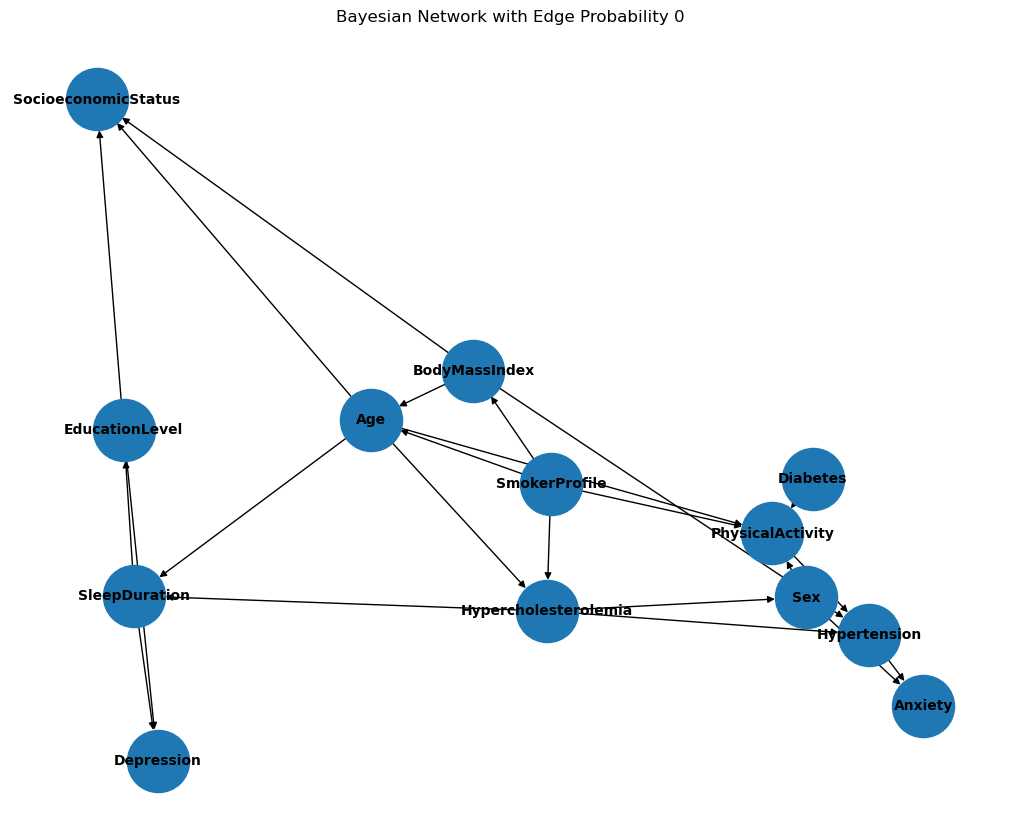


-------------------------------------------------------------------
This is the x 0.1


  0%|          | 0/1000000 [00:00<?, ?it/s]

Edges: [('Sex', 'Anxiety'), ('Sex', 'PhysicalActivity'), ('PhysicalActivity', 'Hypertension'), ('PhysicalActivity', 'SmokerProfile'), ('PhysicalActivity', 'EducationLevel'), ('Age', 'SleepDuration'), ('Age', 'SmokerProfile'), ('Age', 'PhysicalActivity'), ('Age', 'SocioeconomicStatus'), ('SleepDuration', 'Depression'), ('SmokerProfile', 'Hypercholesterolemia'), ('EducationLevel', 'SocioeconomicStatus'), ('BodyMassIndex', 'SmokerProfile'), ('BodyMassIndex', 'Age'), ('BodyMassIndex', 'Hypertension'), ('BodyMassIndex', 'SocioeconomicStatus'), ('Hypertension', 'Hypercholesterolemia'), ('Hypertension', 'Anxiety'), ('Depression', 'EducationLevel'), ('Hypercholesterolemia', 'SleepDuration'), ('Diabetes', 'PhysicalActivity')]
Len of edges: 21
BDeu Score: -31577.62089166942


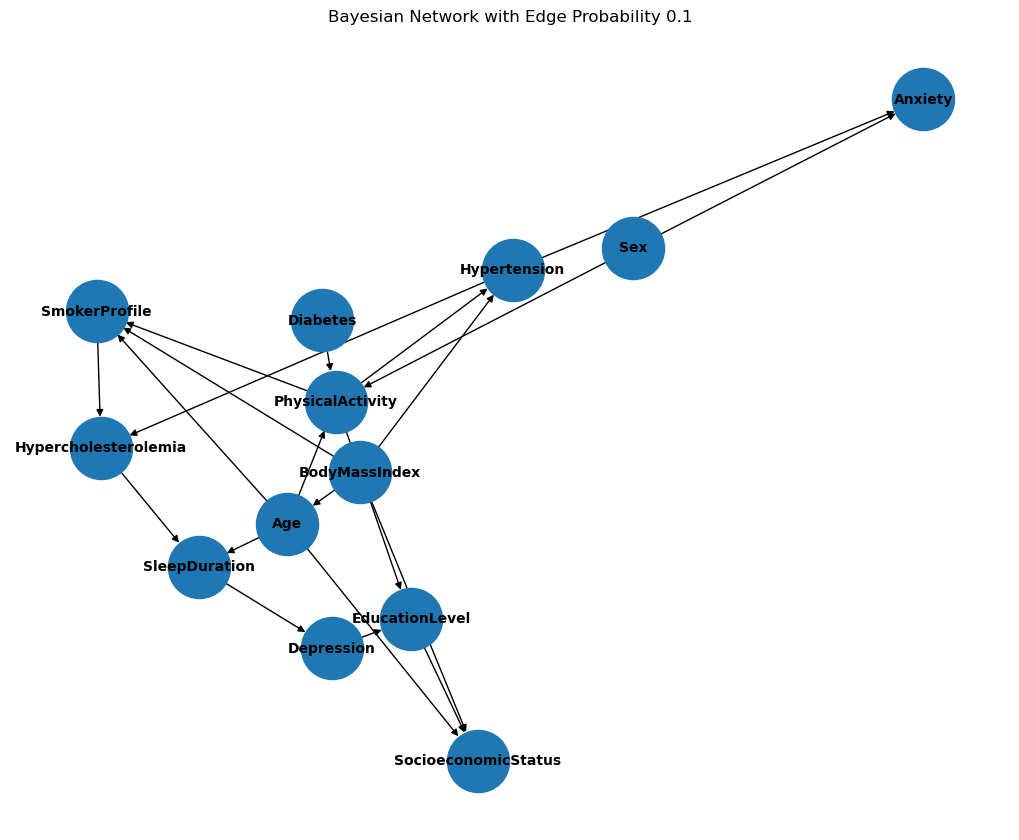


-------------------------------------------------------------------
This is the x 0.2


  0%|          | 0/1000000 [00:00<?, ?it/s]

Edges: [('Sex', 'Anxiety'), ('Sex', 'Hypercholesterolemia'), ('Sex', 'Diabetes'), ('Hypercholesterolemia', 'Hypertension'), ('Hypercholesterolemia', 'Diabetes'), ('Hypercholesterolemia', 'Age'), ('Hypercholesterolemia', 'SleepDuration'), ('Age', 'Diabetes'), ('Age', 'BodyMassIndex'), ('Age', 'SocioeconomicStatus'), ('Age', 'SleepDuration'), ('BodyMassIndex', 'PhysicalActivity'), ('BodyMassIndex', 'SocioeconomicStatus'), ('SleepDuration', 'PhysicalActivity'), ('SleepDuration', 'Depression'), ('EducationLevel', 'SocioeconomicStatus'), ('PhysicalActivity', 'Diabetes'), ('PhysicalActivity', 'EducationLevel'), ('Depression', 'EducationLevel'), ('SmokerProfile', 'BodyMassIndex'), ('SmokerProfile', 'Age'), ('SmokerProfile', 'Hypercholesterolemia'), ('Hypertension', 'PhysicalActivity'), ('Hypertension', 'Anxiety')]
Len of edges: 24
BDeu Score: -31614.80346308438


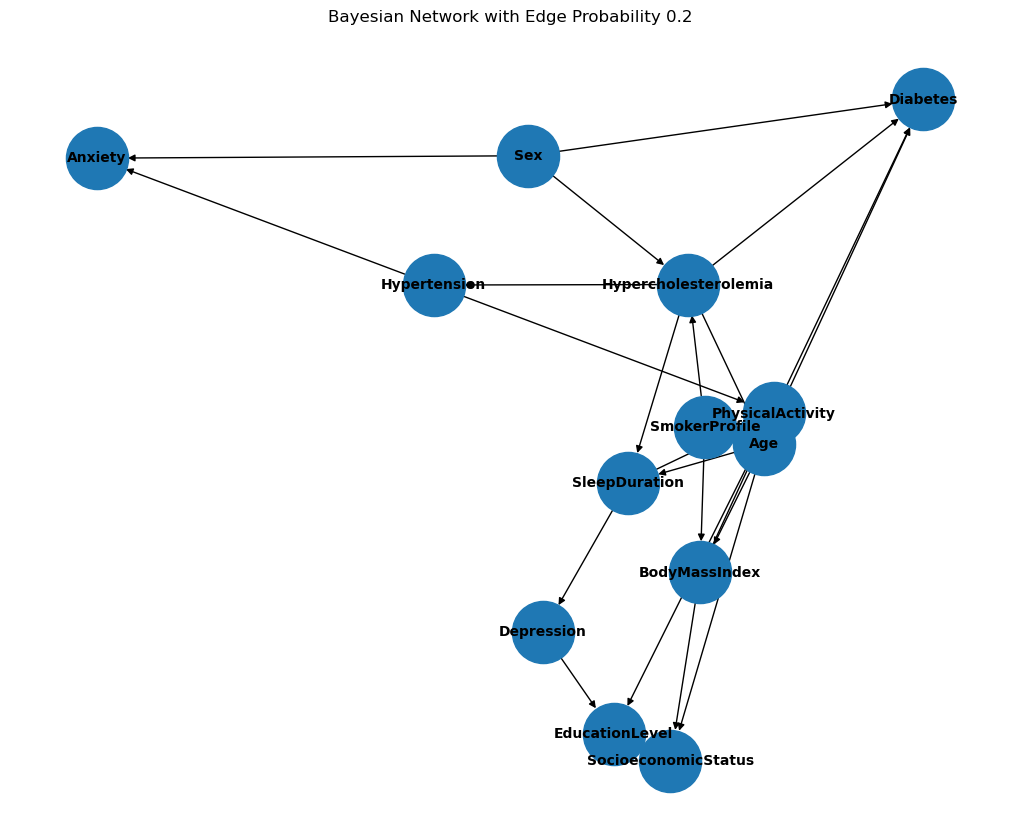


-------------------------------------------------------------------
This is the x 0.30000000000000004


  0%|          | 0/1000000 [00:00<?, ?it/s]

Edges: [('Sex', 'Diabetes'), ('Sex', 'PhysicalActivity'), ('Sex', 'Anxiety'), ('PhysicalActivity', 'Depression'), ('PhysicalActivity', 'Diabetes'), ('PhysicalActivity', 'Hypertension'), ('Age', 'SmokerProfile'), ('Age', 'PhysicalActivity'), ('Age', 'Diabetes'), ('Age', 'Hypercholesterolemia'), ('SmokerProfile', 'PhysicalActivity'), ('SmokerProfile', 'Hypercholesterolemia'), ('Hypercholesterolemia', 'Diabetes'), ('Hypercholesterolemia', 'Hypertension'), ('Hypercholesterolemia', 'Sex'), ('EducationLevel', 'BodyMassIndex'), ('EducationLevel', 'SleepDuration'), ('EducationLevel', 'SocioeconomicStatus'), ('EducationLevel', 'Depression'), ('EducationLevel', 'Age'), ('BodyMassIndex', 'SmokerProfile'), ('BodyMassIndex', 'Age'), ('BodyMassIndex', 'Hypertension'), ('SleepDuration', 'Hypercholesterolemia'), ('SleepDuration', 'Anxiety'), ('SocioeconomicStatus', 'BodyMassIndex'), ('SocioeconomicStatus', 'Age'), ('Hypertension', 'Anxiety')]
Len of edges: 28
BDeu Score: -31625.637211718487


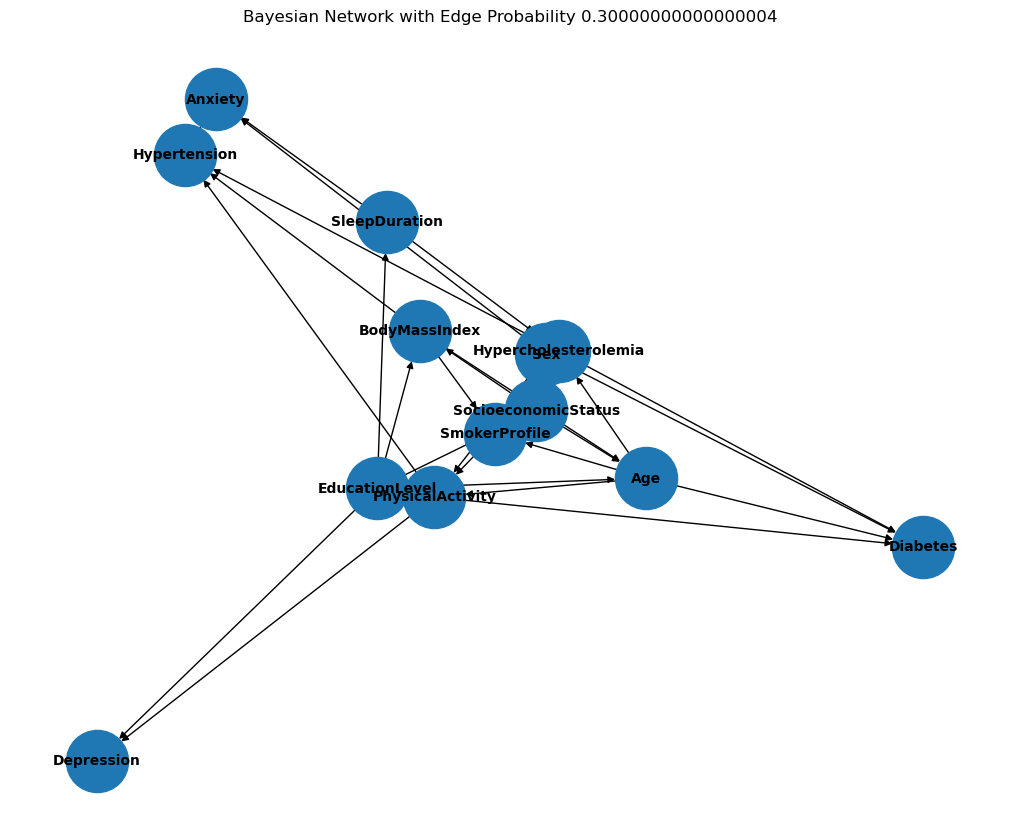


-------------------------------------------------------------------
This is the x 0.4


  0%|          | 0/1000000 [00:00<?, ?it/s]

Edges: [('Sex', 'Age'), ('Sex', 'Diabetes'), ('Sex', 'Anxiety'), ('Age', 'EducationLevel'), ('Age', 'BodyMassIndex'), ('Age', 'SleepDuration'), ('Age', 'Diabetes'), ('Age', 'Hypercholesterolemia'), ('Age', 'SmokerProfile'), ('EducationLevel', 'Depression'), ('BodyMassIndex', 'PhysicalActivity'), ('BodyMassIndex', 'EducationLevel'), ('SleepDuration', 'Depression'), ('SleepDuration', 'PhysicalActivity'), ('Hypercholesterolemia', 'Diabetes'), ('Hypercholesterolemia', 'Hypertension'), ('Hypercholesterolemia', 'SleepDuration'), ('SmokerProfile', 'BodyMassIndex'), ('SmokerProfile', 'Hypercholesterolemia'), ('SocioeconomicStatus', 'Age'), ('SocioeconomicStatus', 'EducationLevel'), ('PhysicalActivity', 'Diabetes'), ('Hypertension', 'PhysicalActivity'), ('Hypertension', 'Anxiety')]
Len of edges: 24
BDeu Score: -31697.432272298087


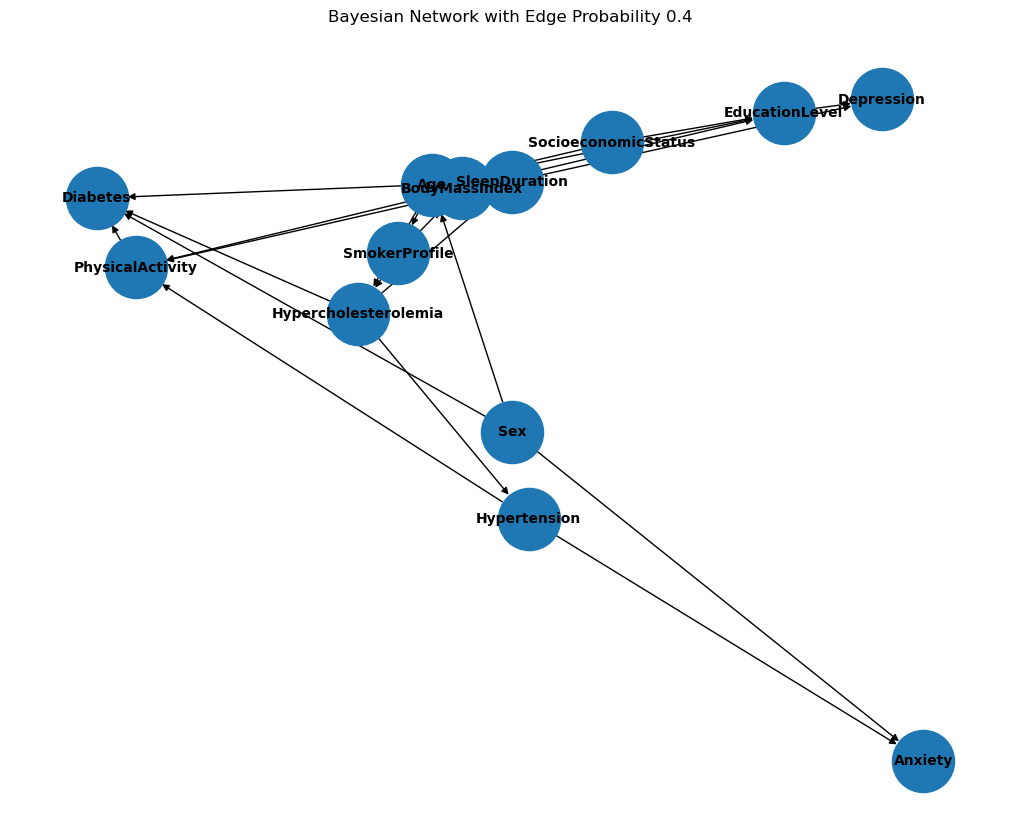


-------------------------------------------------------------------
This is the x 0.5


  0%|          | 0/1000000 [00:00<?, ?it/s]

Edges: [('Sex', 'Age'), ('Sex', 'Anxiety'), ('Sex', 'Diabetes'), ('Age', 'SmokerProfile'), ('Age', 'Hypercholesterolemia'), ('Age', 'Diabetes'), ('Age', 'BodyMassIndex'), ('Age', 'SocioeconomicStatus'), ('SmokerProfile', 'Hypercholesterolemia'), ('Hypercholesterolemia', 'Hypertension'), ('Hypercholesterolemia', 'Diabetes'), ('BodyMassIndex', 'SmokerProfile'), ('SocioeconomicStatus', 'BodyMassIndex'), ('EducationLevel', 'PhysicalActivity'), ('EducationLevel', 'SleepDuration'), ('EducationLevel', 'BodyMassIndex'), ('EducationLevel', 'SocioeconomicStatus'), ('EducationLevel', 'Depression'), ('PhysicalActivity', 'Diabetes'), ('PhysicalActivity', 'Age'), ('PhysicalActivity', 'SmokerProfile'), ('PhysicalActivity', 'Hypertension'), ('PhysicalActivity', 'Sex'), ('SleepDuration', 'Depression'), ('SleepDuration', 'Hypertension'), ('SleepDuration', 'Hypercholesterolemia'), ('Depression', 'PhysicalActivity'), ('Hypertension', 'Anxiety')]
Len of edges: 28
BDeu Score: -31671.901558829344


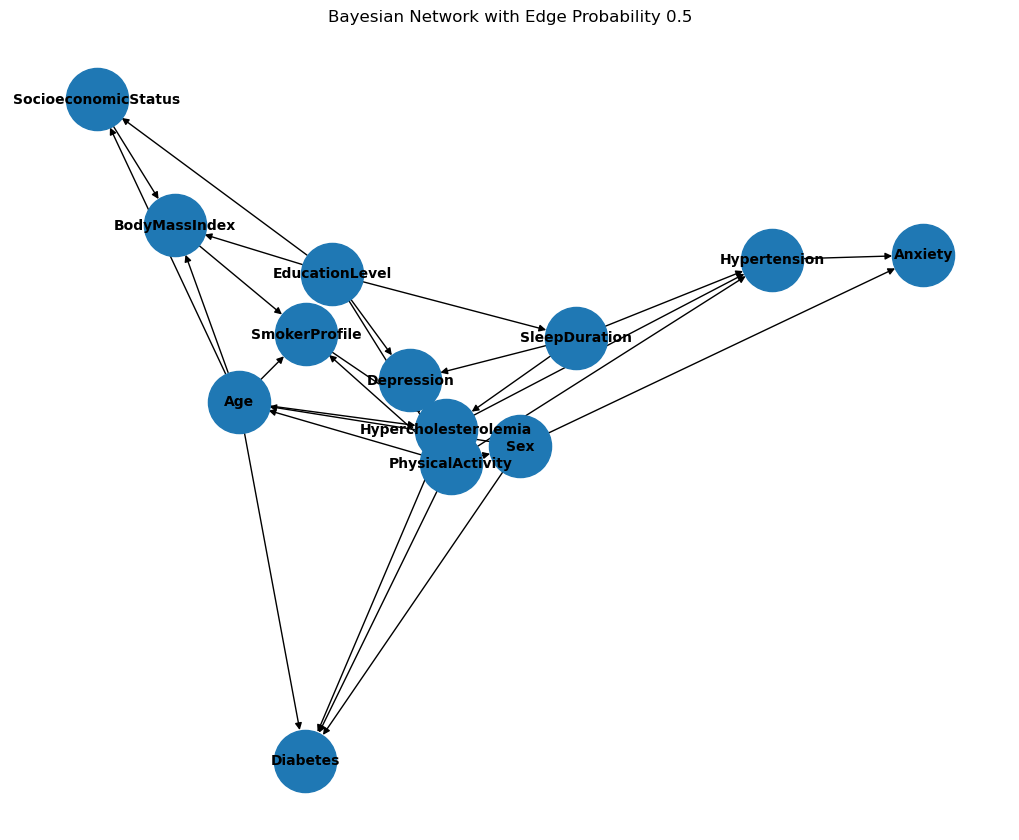


-------------------------------------------------------------------
This is the x 0.6


  0%|          | 0/1000000 [00:00<?, ?it/s]

Edges: [('Sex', 'Hypercholesterolemia'), ('Sex', 'Diabetes'), ('Sex', 'PhysicalActivity'), ('Sex', 'Anxiety'), ('Hypercholesterolemia', 'Diabetes'), ('Hypercholesterolemia', 'SmokerProfile'), ('PhysicalActivity', 'Depression'), ('PhysicalActivity', 'Diabetes'), ('PhysicalActivity', 'Hypertension'), ('PhysicalActivity', 'SmokerProfile'), ('Age', 'BodyMassIndex'), ('Age', 'PhysicalActivity'), ('Age', 'SocioeconomicStatus'), ('Age', 'SmokerProfile'), ('BodyMassIndex', 'SocioeconomicStatus'), ('SmokerProfile', 'BodyMassIndex'), ('EducationLevel', 'SocioeconomicStatus'), ('EducationLevel', 'SleepDuration'), ('EducationLevel', 'Depression'), ('SleepDuration', 'Hypertension'), ('SleepDuration', 'Age'), ('Hypertension', 'Hypercholesterolemia'), ('Hypertension', 'Anxiety')]
Len of edges: 23
BDeu Score: -31646.125015110425


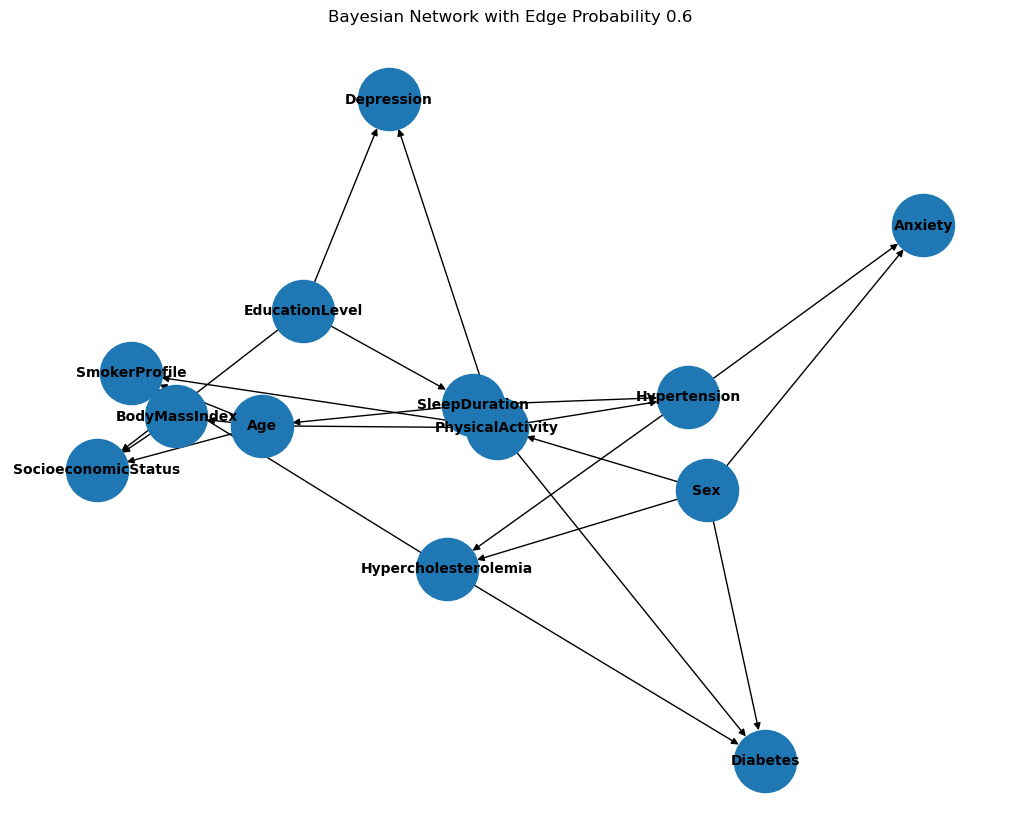


-------------------------------------------------------------------
This is the x 0.7


  0%|          | 0/1000000 [00:00<?, ?it/s]

Edges: [('Sex', 'SocioeconomicStatus'), ('Sex', 'PhysicalActivity'), ('Sex', 'Diabetes'), ('Sex', 'Anxiety'), ('Sex', 'Hypercholesterolemia'), ('SocioeconomicStatus', 'BodyMassIndex'), ('SocioeconomicStatus', 'EducationLevel'), ('PhysicalActivity', 'SmokerProfile'), ('PhysicalActivity', 'Depression'), ('PhysicalActivity', 'Diabetes'), ('PhysicalActivity', 'Hypertension'), ('Hypercholesterolemia', 'Diabetes'), ('Age', 'SocioeconomicStatus'), ('Age', 'BodyMassIndex'), ('Age', 'PhysicalActivity'), ('Age', 'SmokerProfile'), ('BodyMassIndex', 'SmokerProfile'), ('BodyMassIndex', 'Hypertension'), ('BodyMassIndex', 'EducationLevel'), ('EducationLevel', 'Depression'), ('Depression', 'SleepDuration'), ('Hypertension', 'Hypercholesterolemia'), ('Hypertension', 'Anxiety'), ('SleepDuration', 'Hypertension')]
Len of edges: 24
BDeu Score: -31650.09598583922


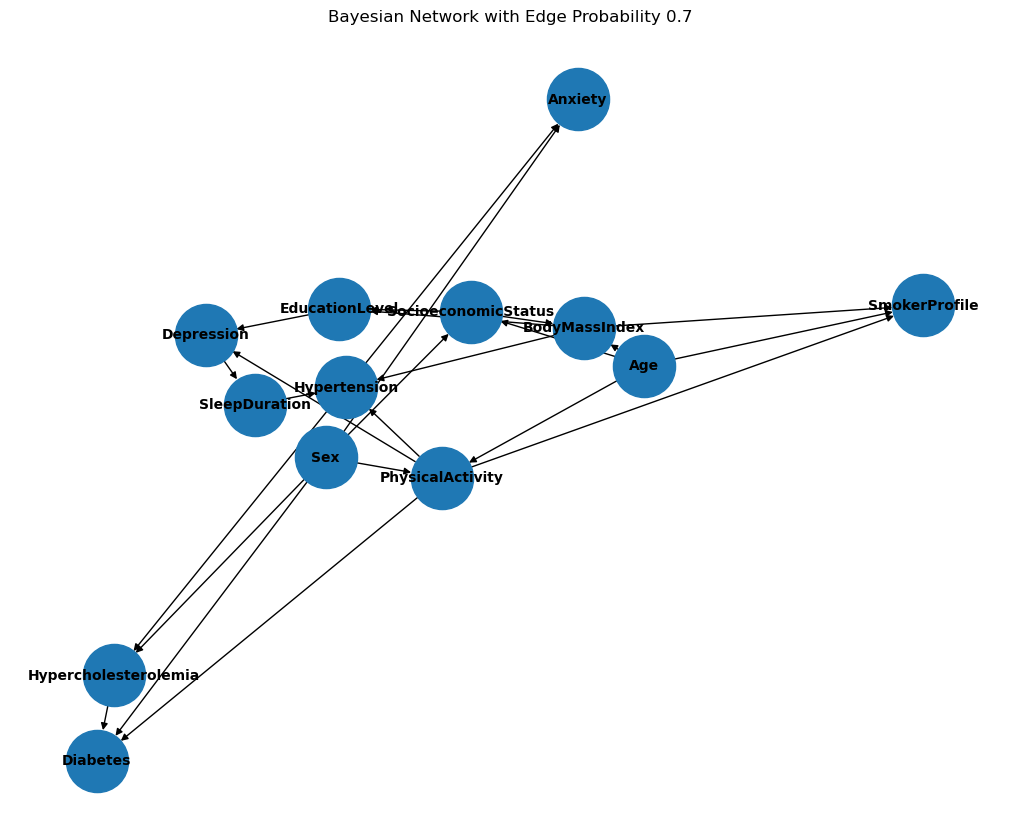


-------------------------------------------------------------------
This is the x 0.7999999999999999


  0%|          | 0/1000000 [00:00<?, ?it/s]

Edges: [('Sex', 'SocioeconomicStatus'), ('Sex', 'PhysicalActivity'), ('Sex', 'Anxiety'), ('Sex', 'Hypercholesterolemia'), ('Sex', 'Diabetes'), ('SocioeconomicStatus', 'BodyMassIndex'), ('SocioeconomicStatus', 'EducationLevel'), ('PhysicalActivity', 'SmokerProfile'), ('PhysicalActivity', 'Hypertension'), ('PhysicalActivity', 'Diabetes'), ('Hypercholesterolemia', 'Diabetes'), ('Age', 'EducationLevel'), ('Age', 'BodyMassIndex'), ('Age', 'SleepDuration'), ('Age', 'SmokerProfile'), ('Age', 'SocioeconomicStatus'), ('Age', 'PhysicalActivity'), ('EducationLevel', 'BodyMassIndex'), ('EducationLevel', 'Depression'), ('BodyMassIndex', 'SmokerProfile'), ('SleepDuration', 'Depression'), ('SleepDuration', 'Hypertension'), ('Hypertension', 'Hypercholesterolemia'), ('Hypertension', 'Anxiety')]
Len of edges: 24
BDeu Score: -31692.564701024046


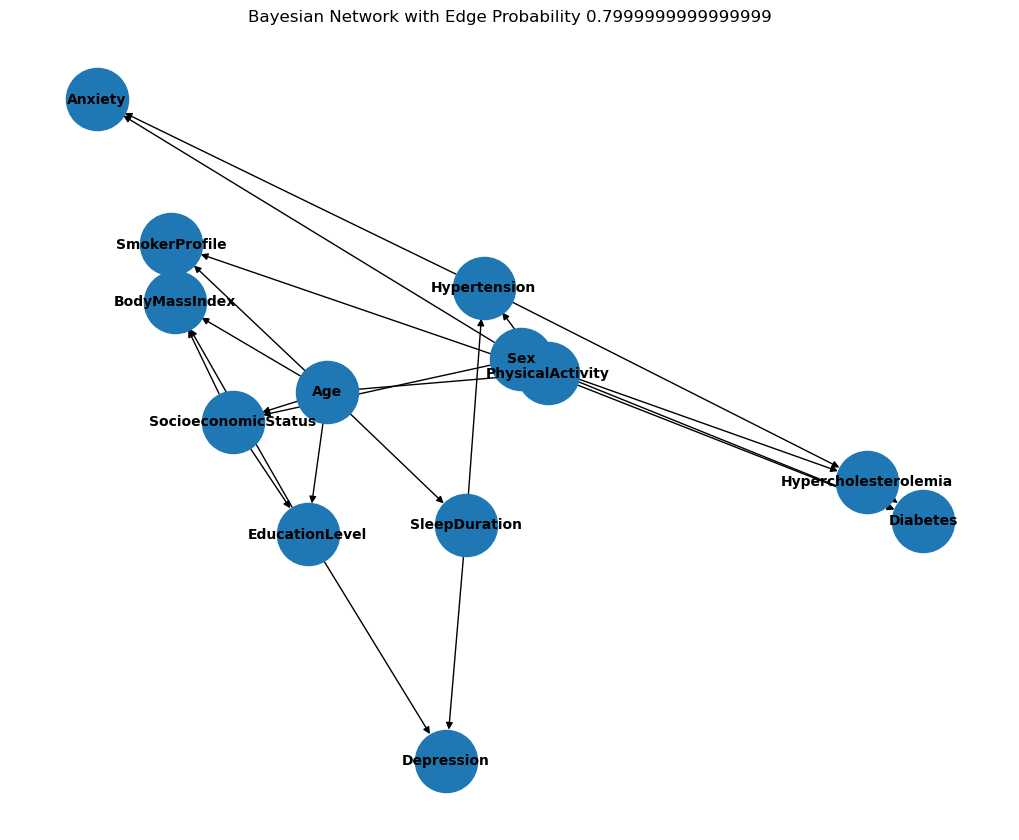


-------------------------------------------------------------------
This is the x 0.8999999999999999


  0%|          | 0/1000000 [00:00<?, ?it/s]

Edges: [('Sex', 'SocioeconomicStatus'), ('Sex', 'Anxiety'), ('Sex', 'Hypercholesterolemia'), ('Sex', 'Diabetes'), ('Sex', 'PhysicalActivity'), ('SocioeconomicStatus', 'BodyMassIndex'), ('SocioeconomicStatus', 'EducationLevel'), ('Hypercholesterolemia', 'Diabetes'), ('PhysicalActivity', 'SmokerProfile'), ('PhysicalActivity', 'Depression'), ('PhysicalActivity', 'Hypertension'), ('PhysicalActivity', 'Diabetes'), ('Age', 'SocioeconomicStatus'), ('Age', 'BodyMassIndex'), ('Age', 'PhysicalActivity'), ('Age', 'SmokerProfile'), ('BodyMassIndex', 'SmokerProfile'), ('BodyMassIndex', 'Hypertension'), ('BodyMassIndex', 'EducationLevel'), ('EducationLevel', 'Depression'), ('Depression', 'SleepDuration'), ('Hypertension', 'Hypercholesterolemia'), ('Hypertension', 'Anxiety'), ('SleepDuration', 'Hypertension')]
Len of edges: 24
BDeu Score: -31650.095985839216


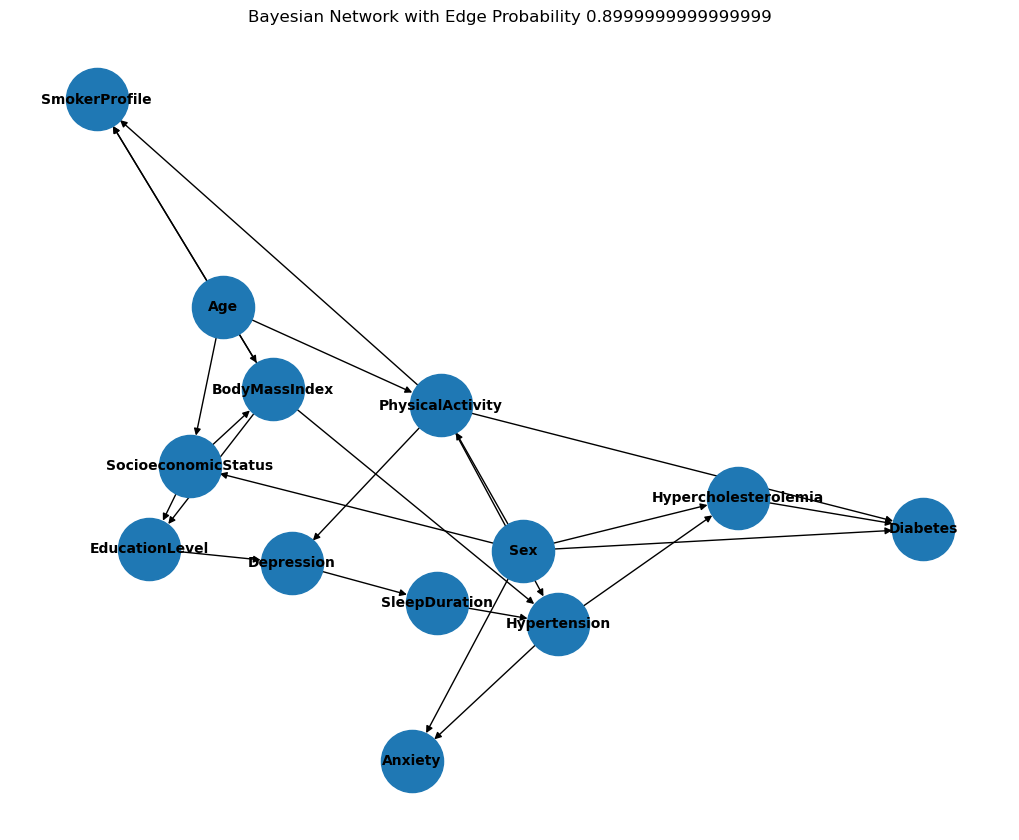


-------------------------------------------------------------------
This is the x 0.9999999999999999


  0%|          | 0/1000000 [00:00<?, ?it/s]

Edges: [('Sex', 'SocioeconomicStatus'), ('Sex', 'PhysicalActivity'), ('Sex', 'Anxiety'), ('Sex', 'Hypercholesterolemia'), ('Sex', 'Diabetes'), ('SocioeconomicStatus', 'BodyMassIndex'), ('SocioeconomicStatus', 'EducationLevel'), ('PhysicalActivity', 'SmokerProfile'), ('PhysicalActivity', 'Depression'), ('PhysicalActivity', 'Hypertension'), ('PhysicalActivity', 'Diabetes'), ('Hypercholesterolemia', 'Diabetes'), ('Age', 'SocioeconomicStatus'), ('Age', 'BodyMassIndex'), ('Age', 'PhysicalActivity'), ('Age', 'SmokerProfile'), ('BodyMassIndex', 'SmokerProfile'), ('BodyMassIndex', 'EducationLevel'), ('EducationLevel', 'Depression'), ('Depression', 'SleepDuration'), ('Hypertension', 'Hypercholesterolemia'), ('Hypertension', 'Anxiety'), ('SleepDuration', 'Hypertension')]
Len of edges: 23
BDeu Score: -31706.52409353748


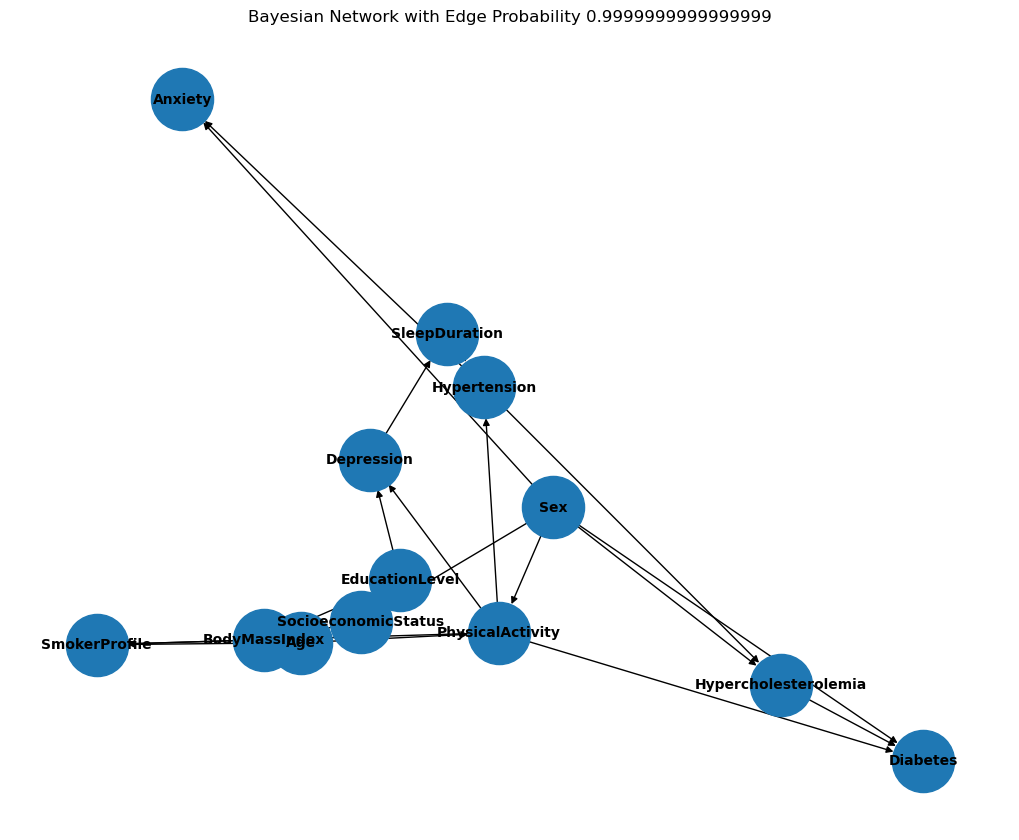

In [12]:
from pgmpy.estimators import HillClimbSearch, BDeuScore, MaximumLikelihoodEstimator
from pgmpy.models import BayesianNetwork
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from pgmpy.base import DAG

# Function to initialize a random graph structure with given nodes and edge probability
def initialize_graph(nodes, p=1):
    G = DAG()
    G.add_nodes_from(nodes=nodes)
    init = G.get_random(n_nodes=len(nodes), edge_prob=p)
    ls = []
    mapping = {}
    for k in range(len(nodes)):
        mapping[k] = nodes[k]
    for i, j in init.edges:
        ls.append((mapping[i], mapping[j]))
    G.add_edges_from(ebunch=ls)
    return G

# Iterate to vary the edge probability in the initial graph structure
x = 0
while x < 1:
    print()
    print("-------------------------------------------------------------------")
    print('This is the x', x)

    # Initialize the Hill Climbing search with BDeu Score
    bdeu_scoring = BDeuScore(train_data, equivalent_sample_size=10)  # Use equivalent_sample_size instead of pseudo_counts
    es = HillClimbSearch(train_data)

    # Estimate the best model with initial graph based on random structure
    best_model_structure = es.estimate(scoring_method=bdeu_scoring, start_dag=initialize_graph(nodes=[
        'Sex', 'Age', 'EducationLevel', 'SocioeconomicStatus',
        'BodyMassIndex', 'PhysicalActivity', 'SleepDuration',
        'SmokerProfile', 'Anxiety', 'Depression',
        'Hypertension', 'Hypercholesterolemia', 'Diabetes'
    ], p=x))

    # Convert to a BayesianNetwork model and fit it to get CPDs
    best_model = BayesianNetwork(best_model_structure.edges())
    best_model.fit(train_data, estimator=MaximumLikelihoodEstimator)

    # Calculate the BDeu score (already computed during model learning)
    bdeu_score = bdeu_scoring.score(best_model)
    print('Edges:', best_model.edges())
    print('Len of edges:', len(best_model.edges()))
    print('BDeu Score:', bdeu_score)
       # Convert Bayesian network to NetworkX DiGraph for visualization
    nx_model = nx.DiGraph(best_model.edges())

    # Draw the network
    plt.figure(figsize=(10, 8))
    nx.draw(nx_model, with_labels=True, node_size=2000, font_size=10, font_color="black", font_weight="bold")
    plt.title(f"Bayesian Network with Edge Probability {x}")
    plt.show()

    x += 0.1

**Parameter Selection and Visualization**

* Threshold Selection:
 After analyzing the 10 networks generated with varying connection thresholds (x ranging from 0 to 1 in increments of 0.1), we selected x = 0.6. This value provided the best balance between connectivity and interpretability, resulting in a network that captured the most relevant relationships without adding excessive or redundant links.
* Network Visualization:
 To visualize the selected network, we used the PyGraphviz library, which allowed us to create a clear and intuitive graph representing the nodes and connections. This step was crucial for interpreting the learned structure and identifying any necessary adjustments. The graph provided a visual representation of the inferred relationships, making it easier to analyze and communicate the results.



In [6]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 49 not upgraded.
Need to get 2,434 kB of archives.
After this operation, 7,681 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2.1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2.1 [2,038 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgail18 amd64 2.24.33-2ubuntu2.1 [15.9 kB]
Get:4 http://archive.ubun

In [13]:
from IPython.display import Image, display
from pgmpy.estimators import HillClimbSearch, BDeuScore, MaximumLikelihoodEstimator
from pgmpy.models import BayesianNetwork
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from pgmpy.base import DAG

lista = [('Sex', 'Age'), ('Sex', 'Anxiety'), ('Sex', 'Diabetes'), ('Age', 'SocioeconomicStatus'), ('Age', 'BodyMassIndex'), ('Age', 'SmokerProfile'), ('Age', 'Diabetes'), ('Age', 'SleepDuration'), ('Age', 'Hypercholesterolemia'), ('BodyMassIndex', 'Hypertension'), ('BodyMassIndex', 'SocioeconomicStatus'), ('SmokerProfile', 'BodyMassIndex'), ('SleepDuration', 'Depression'), ('SleepDuration', 'Hypercholesterolemia'), ('Hypercholesterolemia', 'Diabetes'), ('Hypercholesterolemia', 'Hypertension'), ('Hypercholesterolemia', 'SmokerProfile'), ('EducationLevel', 'SocioeconomicStatus'), ('Hypertension', 'Anxiety'), ('PhysicalActivity', 'Hypertension'), ('PhysicalActivity', 'Age'), ('PhysicalActivity', 'SmokerProfile'), ('PhysicalActivity', 'Diabetes'), ('PhysicalActivity', 'Sex'), ('PhysicalActivity', 'EducationLevel'), ('Depression', 'EducationLevel')]

# Convert to a BayesianNetwork model and fit it to get CPDs
best_model = BayesianNetwork(lista)
best_model.fit(train_data, estimator=MaximumLikelihoodEstimator)

bdeu_score = bdeu_scoring.score(best_model)
print('Edges:', best_model.edges())
print('Len of edges:', len(best_model.edges()))
print('BDeu Score:', bdeu_score)

# Works only in colab
#m = best_model.to_graphviz()
#img = m.draw('bayesian_network.png', format='png',prog="dot")
# Display the graph inline
#from IPython.display import Image, display
#display(Image('bayesian_network.png'))



Edges: [('Sex', 'Age'), ('Sex', 'Anxiety'), ('Sex', 'Diabetes'), ('Age', 'SocioeconomicStatus'), ('Age', 'BodyMassIndex'), ('Age', 'SmokerProfile'), ('Age', 'Diabetes'), ('Age', 'SleepDuration'), ('Age', 'Hypercholesterolemia'), ('BodyMassIndex', 'Hypertension'), ('BodyMassIndex', 'SocioeconomicStatus'), ('SmokerProfile', 'BodyMassIndex'), ('SleepDuration', 'Depression'), ('SleepDuration', 'Hypercholesterolemia'), ('Hypercholesterolemia', 'Diabetes'), ('Hypercholesterolemia', 'Hypertension'), ('Hypercholesterolemia', 'SmokerProfile'), ('Hypertension', 'Anxiety'), ('Depression', 'EducationLevel'), ('EducationLevel', 'SocioeconomicStatus'), ('PhysicalActivity', 'Hypertension'), ('PhysicalActivity', 'Age'), ('PhysicalActivity', 'SmokerProfile'), ('PhysicalActivity', 'Diabetes'), ('PhysicalActivity', 'Sex'), ('PhysicalActivity', 'EducationLevel')]
Len of edges: 26
BDeu Score: -31553.535796845776


We generated the network visualization using PyGraphviz on Google Colab, as PyGraphviz was not functioning correctly in the local Jupyter Notebook environment. After creating the network, we exported the visualization as an image file and then uploaded it to the notebook for inclusion in the report. Here is the network **visualization**:

![Image Description](bayesian_network.png)


decide on the network (connections, etc.)

**Post-Selection Analysis and Forcing Links**

After selecting x = 0.6 for the network's connection threshold, we proceeded to review the learned network structure. During this analysis, we examined the relationships (edges) between variables to ensure they made sense based on both the data and domain knowledge.

* Reviewing the Connections:
 We carefully examined all the edges to confirm that they represented meaningful relationships. Some edges, such as **(give examples) !!!!!!**
   
* Forcing Specific Links:
 In cases where the network did not capture important known relationships, we decided to enforce certain links. For example, (give examples) !!!! **(we didnt have in this case, right?)**

* Limiting Manual Adjustments:
 While we enforced a few critical edges, we avoided over-manipulating the network. Too many manual adjustments could have led to a network that was more constructed by hand than learned from the data. Thus, we allowed the algorithm to determine most of the structure, only intervening when necessary. **( is this necessary??? )**



## 3. Network and problem analysis.
### a) How age affects sleep duration

In [14]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(best_model)

print("Query for Age group 18-24:")
print(infer.query(['SleepDuration'], evidence={'Age':'18-24'}))
print("\nQuery for Age group 24-34:")
print(infer.query(['SleepDuration'], evidence={'Age':'24-34'}))
print("\nQuery for Age group 34-44:")
print(infer.query(['SleepDuration'], evidence={'Age':'34-44'}))
print("\nQuery for Age group 44-54:")
print(infer.query(['SleepDuration'], evidence={'Age':'44-54'}))
print("\nQuery for Age group 54-64:")
print(infer.query(['SleepDuration'], evidence={'Age':'54-64'}))
print("\nQuery for Age group 64-74:")
print(infer.query(['SleepDuration'], evidence={'Age':'64-74'}))

Query for Age group 18-24:
+-------------------------+----------------------+
| SleepDuration           |   phi(SleepDuration) |
+=========================+======================+
| SleepDuration(6-9hours) |               1.0000 |
+-------------------------+----------------------+
| SleepDuration(<6hours)  |               0.0000 |
+-------------------------+----------------------+
| SleepDuration(>9hours)  |               0.0000 |
+-------------------------+----------------------+

Query for Age group 24-34:
+-------------------------+----------------------+
| SleepDuration           |   phi(SleepDuration) |
+=========================+======================+
| SleepDuration(6-9hours) |               0.9420 |
+-------------------------+----------------------+
| SleepDuration(<6hours)  |               0.0565 |
+-------------------------+----------------------+
| SleepDuration(>9hours)  |               0.0015 |
+-------------------------+----------------------+

Query for Age group 34-44:

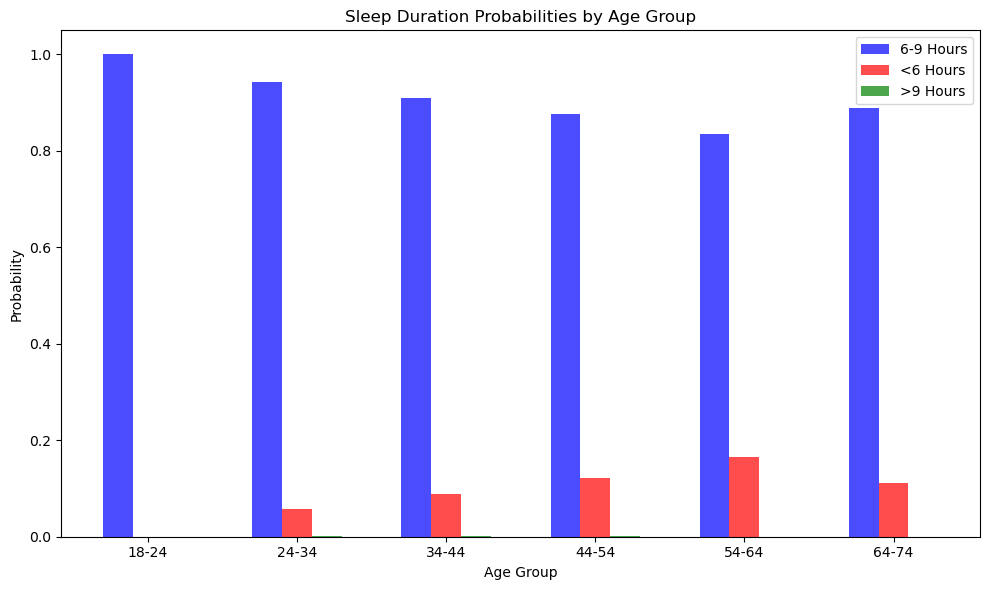

In [15]:
#This code was generated by ChatGPT with the output of the previous section and the prompt “can you put this in a graph”

import matplotlib.pyplot as plt
import numpy as np

# Data extracted from the user's input
ages = ['18-24', '24-34', '34-44', '44-54', '54-64', '64-74']
sleep_6_9 = [1.0000, 0.9420, 0.9100, 0.8772, 0.8350, 0.8889]
sleep_less_6 = [0.0000, 0.0565, 0.0893, 0.1211, 0.1650, 0.1111]
sleep_more_9 = [0.0000, 0.0015, 0.0007, 0.0017, 0.0000, 0.0000]

x = np.arange(len(ages))  # X-axis positions

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(x - 0.2, sleep_6_9, width=0.2, label='6-9 Hours', color='blue', alpha=0.7)
plt.bar(x, sleep_less_6, width=0.2, label='<6 Hours', color='red', alpha=0.7)
plt.bar(x + 0.2, sleep_more_9, width=0.2, label='>9 Hours', color='green', alpha=0.7)

# Labels and title
plt.xlabel('Age Group')
plt.ylabel('Probability')
plt.title('Sleep Duration Probabilities by Age Group')
plt.xticks(x, ages)
plt.legend()

# Display the graph
plt.tight_layout()
plt.show()

The relationship between age and sleep duration was explored by visualizing the probability distribution of different sleep durations (6–9 hours, less than 6 hours, and more than 9 hours) across various age groups. The following insights were observed:

* 6-9 Hours of Sleep: The majority of participants across all age groups reported sleeping 6-9 hours, with the highest probabilities observed in the younger age groups (18-24 and 24-34). As age increases, the likelihood of getting 6-9 hours of sleep slightly decreases, but it remains the dominant sleep category.
* Less Than 6 Hours of Sleep: This category sees an increase in probability as age rises, with older participants (44-54, 54-64) showing higher chances of getting less than 6 hours of sleep compared to younger participants. This suggests that younger individuals tend to maintain a more consistent sleep schedule within the recommended 6-9 hours range, while older individuals may experience more sleep disturbances or shorter sleep duration.
* More Than 9 Hours of Sleep: ????

**Interpretation:**
* The graph visually highlights that younger individuals (18-34 years old) are more likely to sleep within the ideal 6-9 hour range, while older individuals tend to have shorter sleep durations (less than 6 hours). This may reflect lifestyle, work patterns, or health-related factors that influence sleep as individuals age.



This analysis reveals a clear trend in how age influences sleep duration, with a higher probability of inadequate sleep (less than 6 hours) in older age groups and more consistent sleep patterns in younger individuals. These insights could be useful when considering how age might correlate with other health conditions, such as hypertension or diabetes, in the context of the Bayesian network.



### b) How does the smoker profile affect the three medical conditions (diabetes,hypertension and hypercholesterolemia)

In [16]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(best_model)

# Query for Diabetes with different smoker profiles
print("Query for Diabetes with Non-Smokers:")
print(infer.query(['Diabetes'],  evidence={'SmokerProfile':'Non_Smoker'}))

print("\nQuery for Diabetes with Ex-Smokers:")
print(infer.query(['Diabetes'],  evidence={'SmokerProfile':'Ex_Smoker'}))

print("\nQuery for Diabetes with Smokers:")
print(infer.query(['Diabetes'],  evidence={'SmokerProfile':'Smoker'}))

# Query for Hypertension with different smoker profiles
print("\nQuery for Hypertension with Non-Smokers:")
print(infer.query(['Hypertension'],  evidence={'SmokerProfile':'Non_Smoker'}))

print("\nQuery for Hypertension with Ex-Smokers:")
print(infer.query(['Hypertension'],  evidence={'SmokerProfile':'Ex_Smoker'}))

print("\nQuery for Hypertension with Smokers:")
print(infer.query(['Hypertension'],  evidence={'SmokerProfile':'Smoker'}))

# Query for Hypercholesterolemia with different smoker profiles
print("\nQuery for Hypercholesterolemia with Non-Smokers:")
print(infer.query(['Hypercholesterolemia'],  evidence={'SmokerProfile':'Non_Smoker'}))

print("\nQuery for Hypercholesterolemia with Ex-Smokers:")
print(infer.query(['Hypercholesterolemia'],  evidence={'SmokerProfile':'Ex_Smoker'}))

print("\nQuery for Hypercholesterolemia with Smokers:")
print(infer.query(['Hypercholesterolemia'],  evidence={'SmokerProfile':'Smoker'}))


Query for Diabetes with Non-Smokers:
+---------------+-----------------+
| Diabetes      |   phi(Diabetes) |
+===============+=================+
| Diabetes(No)  |          0.9551 |
+---------------+-----------------+
| Diabetes(Yes) |          0.0449 |
+---------------+-----------------+

Query for Diabetes with Ex-Smokers:
+---------------+-----------------+
| Diabetes      |   phi(Diabetes) |
+===============+=================+
| Diabetes(No)  |          0.9527 |
+---------------+-----------------+
| Diabetes(Yes) |          0.0473 |
+---------------+-----------------+

Query for Diabetes with Smokers:
+---------------+-----------------+
| Diabetes      |   phi(Diabetes) |
+===============+=================+
| Diabetes(No)  |          0.9520 |
+---------------+-----------------+
| Diabetes(Yes) |          0.0480 |
+---------------+-----------------+

Query for Hypertension with Non-Smokers:
+-------------------+---------------------+
| Hypertension      |   phi(Hypertension) |
+=====

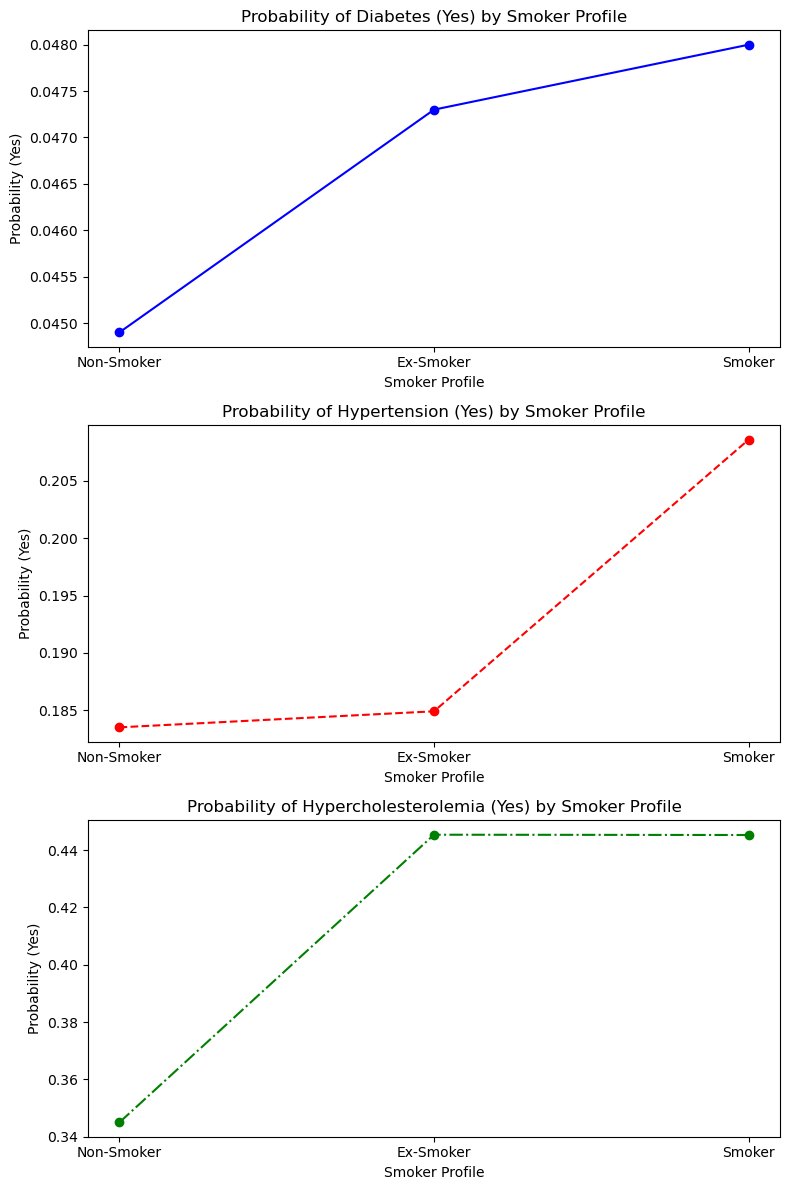

In [10]:
# This code was generated by ChatGPT with the output of the previous section and the prompt:
# “Can you make a graph for the progression each having each disease so the (yes ) probability” and “Make it in 3 separate graphs to make the value progression pop out more you can just give me the code”

import matplotlib.pyplot as plt
import numpy as np

# Data extracted from the user's input
smoker_profiles = ['Non-Smoker', 'Ex-Smoker', 'Smoker']
diabetes_yes = [0.0449, 0.0473, 0.0480]
hypertension_yes = [0.1835, 0.1849, 0.2086]
hypercholesterolemia_yes = [0.3450, 0.4454, 0.4453]


x = np.arange(len(smoker_profiles))  # X-axis positions

# Create separate graphs for each disease
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Diabetes
axs[0].plot(x, diabetes_yes, marker='o', color='blue', linestyle='-')
axs[0].set_title('Probability of Diabetes (Yes) by Smoker Profile')
axs[0].set_xlabel('Smoker Profile')
axs[0].set_ylabel('Probability (Yes)')
axs[0].set_xticks(x)
axs[0].set_xticklabels(smoker_profiles)

# Hypertension
axs[1].plot(x, hypertension_yes, marker='o', color='red', linestyle='--')
axs[1].set_title('Probability of Hypertension (Yes) by Smoker Profile')
axs[1].set_xlabel('Smoker Profile')
axs[1].set_ylabel('Probability (Yes)')
axs[1].set_xticks(x)
axs[1].set_xticklabels(smoker_profiles)

# Hypercholesterolemia
axs[2].plot(x, hypercholesterolemia_yes, marker='o', color='green', linestyle='-.')
axs[2].set_title('Probability of Hypercholesterolemia (Yes) by Smoker Profile')
axs[2].set_xlabel('Smoker Profile')
axs[2].set_ylabel('Probability (Yes)')
axs[2].set_xticks(x)
axs[2].set_xticklabels(smoker_profiles)

# Adjust layout
plt.tight_layout()
plt.show()

**Analysis of Smoker Profile and Its Impact on Medical Conditions**

The impact of smoker profile (Non-Smoker, Ex-Smoker, and Smoker) on the likelihood of developing diabetes, hypertension, and hypercholesterolemia was explored by visualizing the probability of each condition across different smoker profiles. The following insights were derived from the plots:

**1. Diabetes:**
* The values are close to 0.05 for all three categories, indicating that smoking and ex-smoking do not significantly affect the likelihood of diabetes, at least based on this dataset.

**2. Hypertension:**
* For hypertension, there is a noticeable increase in the probability of the condition among Smokers compared to Non-Smokers and Ex-Smokers. The probability of hypertension (Yes) is approximately 0.18 for Non-Smokers and Ex-Smokers, but it rises to around 0.21 for Smokers. This suggests that smoking may increase the risk of developing hypertension, aligning with established medical knowledge that smoking is a major risk factor for high blood pressure.

**3. Hypercholesterolemia:**
* Hypercholesterolemia (high cholesterol) also shows an interesting trend. The probability of having hypercholesterolemia is higher for Smokers and Ex-Smokers compared to Non-Smokers, with values of around 0.45 for both groups versus approximately 0.35 for Non-Smokers. This indicates that smoking and having a history of smoking could be linked to a higher likelihood of developing high cholesterol.


**Interpretation:**
* Smoking and Ex-Smoking appear to be associated with higher probabilities of developing hypertension and hypercholesterolemia, but not significantly with diabetes in this dataset.
* The Non-Smoker category consistently shows lower probabilities for both hypertension and hypercholesterolemia, supporting the well-established idea that smoking increases the risks for cardiovascular and metabolic conditions.
* Ex-Smokers show probabilities closer to Smokers than to Non-Smokers for both hypertension and hypercholesterolemia, which may reflect long-term health effects even after quitting smoking.


### c) How body mass index affects the three medical conditions

In [43]:
print("Querying Diabetes for Underweight BMI:")
print(infer.query(['Diabetes'], evidence={'BodyMassIndex': 'Underweight'}))

print("Querying Diabetes for Normal BMI:")
print(infer.query(['Diabetes'], evidence={'BodyMassIndex': 'Normal'}))

print("Querying Diabetes for Overweight BMI:")
print(infer.query(['Diabetes'], evidence={'BodyMassIndex': 'Overweight'}))

print("Querying Diabetes for Obese BMI:")
print(infer.query(['Diabetes'], evidence={'BodyMassIndex': 'Obese'}))

print("\nQuerying Hypertension for Underweight BMI:")
print(infer.query(['Hypertension'], evidence={'BodyMassIndex': 'Underweight'}))

print("Querying Hypertension for Normal BMI:")
print(infer.query(['Hypertension'], evidence={'BodyMassIndex': 'Normal'}))

print("Querying Hypertension for Overweight BMI:")
print(infer.query(['Hypertension'], evidence={'BodyMassIndex': 'Overweight'}))

print("Querying Hypertension for Obese BMI:")
print(infer.query(['Hypertension'], evidence={'BodyMassIndex': 'Obese'}))

print("\nQuerying Hypercholesterolemia for Underweight BMI:")
print(infer.query(['Hypercholesterolemia'], evidence={'BodyMassIndex': 'Underweight'}))

print("Querying Hypercholesterolemia for Normal BMI:")
print(infer.query(['Hypercholesterolemia'], evidence={'BodyMassIndex': 'Normal'}))

print("Querying Hypercholesterolemia for Overweight BMI:")
print(infer.query(['Hypercholesterolemia'], evidence={'BodyMassIndex': 'Overweight'}))

print("Querying Hypercholesterolemia for Obese BMI:")
print(infer.query(['Hypercholesterolemia'], evidence={'BodyMassIndex': 'Obese'}))


Querying Diabetes for Underweight BMI:
+---------------+-----------------+
| Diabetes      |   phi(Diabetes) |
+===============+=================+
| Diabetes(No)  |          0.9541 |
+---------------+-----------------+
| Diabetes(Yes) |          0.0459 |
+---------------+-----------------+
Querying Diabetes for Normal BMI:
+---------------+-----------------+
| Diabetes      |   phi(Diabetes) |
+===============+=================+
| Diabetes(No)  |          0.9507 |
+---------------+-----------------+
| Diabetes(Yes) |          0.0493 |
+---------------+-----------------+
Querying Diabetes for Overweight BMI:
+---------------+-----------------+
| Diabetes      |   phi(Diabetes) |
+===============+=================+
| Diabetes(No)  |          0.9539 |
+---------------+-----------------+
| Diabetes(Yes) |          0.0461 |
+---------------+-----------------+
Querying Diabetes for Obese BMI:
+---------------+-----------------+
| Diabetes      |   phi(Diabetes) |
+===============+===========

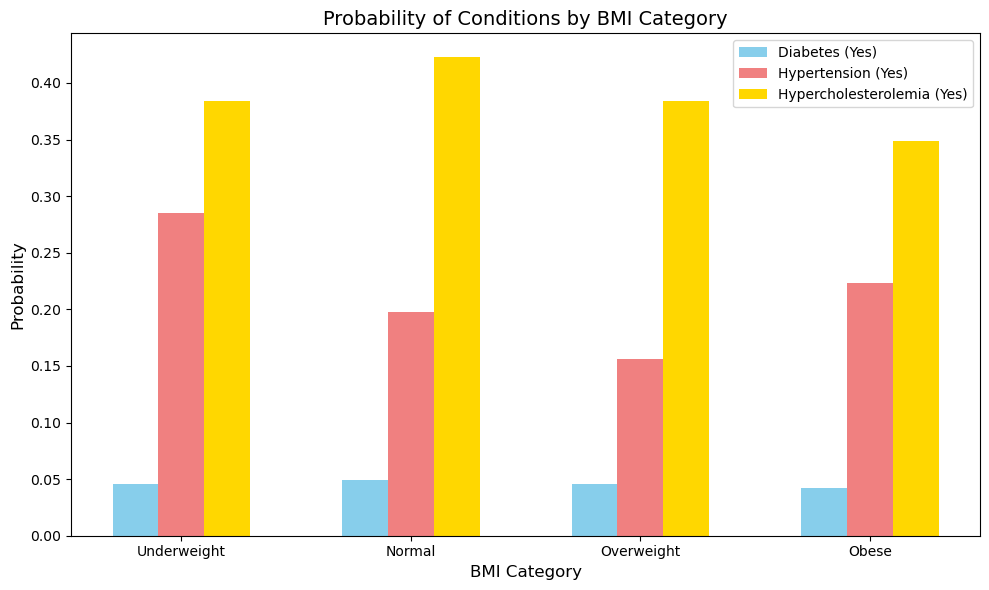

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['Underweight', 'Normal', 'Overweight', 'Obese']
diabetes_yes = [0.0459, 0.0493, 0.0461, 0.0419]
hypertension_yes = [0.2849, 0.1974, 0.1558, 0.2234]
hypercholesterolemia_yes = [0.3840, 0.4227, 0.3840, 0.3485]

# Creating subplots
x = np.arange(len(categories))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

# Bars for each condition
ax.bar(x - width, diabetes_yes, width, label='Diabetes (Yes)', color='skyblue')
ax.bar(x, hypertension_yes, width, label='Hypertension (Yes)', color='lightcoral')
ax.bar(x + width, hypercholesterolemia_yes, width, label='Hypercholesterolemia (Yes)', color='gold')

# Labels and title
ax.set_xlabel('BMI Category', fontsize=12)
ax.set_ylabel('Probability', fontsize=12)
ax.set_title('Probability of Conditions by BMI Category', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Show the graph
plt.tight_layout()
plt.show()

### d)
**Education Level as a Mediator**

* Evaluate whether education level’s effect is moderated by factors like **physical activity**, **smoker profile**, or **BMI**.




In [32]:
print("Querying Physical Activity for Education Level 1:")
print(infer.query(['PhysicalActivity'], evidence={'EducationLevel': 1}))

print("Querying Physical Activity for Education Level 2:")
print(infer.query(['PhysicalActivity'], evidence={'EducationLevel': 2}))

print("Querying Physical Activity for Education Level 3:")
print(infer.query(['PhysicalActivity'], evidence={'EducationLevel': 3}))

print("\nQuerying Smoker Profile for Education Level 1:")
print(infer.query(['SmokerProfile'], evidence={'EducationLevel': 1}))

print("Querying Smoker Profile for Education Level 2:")
print(infer.query(['SmokerProfile'], evidence={'EducationLevel': 2}))

print("Querying Smoker Profile for Education Level 3:")
print(infer.query(['SmokerProfile'], evidence={'EducationLevel': 3}))

print("\nQuerying Body Mass Index for Education Level 1:")
print(infer.query(['BodyMassIndex'], evidence={'EducationLevel': 1}))

print("Querying Body Mass Index for Education Level 2:")
print(infer.query(['BodyMassIndex'], evidence={'EducationLevel': 2}))

print("Querying Body Mass Index for Education Level 3:")
print(infer.query(['BodyMassIndex'], evidence={'EducationLevel': 3}))


Querying Physical Activity for Education Level 1:
+-----------------------------------------+-------------------------+
| PhysicalActivity                        |   phi(PhysicalActivity) |
+=========================================+=========================+
| PhysicalActivity(Insufficiently Active) |                  0.6012 |
+-----------------------------------------+-------------------------+
| PhysicalActivity(Regularly Active)      |                  0.3988 |
+-----------------------------------------+-------------------------+
Querying Physical Activity for Education Level 2:
+-----------------------------------------+-------------------------+
| PhysicalActivity                        |   phi(PhysicalActivity) |
+=========================================+=========================+
| PhysicalActivity(Insufficiently Active) |                  0.7112 |
+-----------------------------------------+-------------------------+
| PhysicalActivity(Regularly Active)      |                 

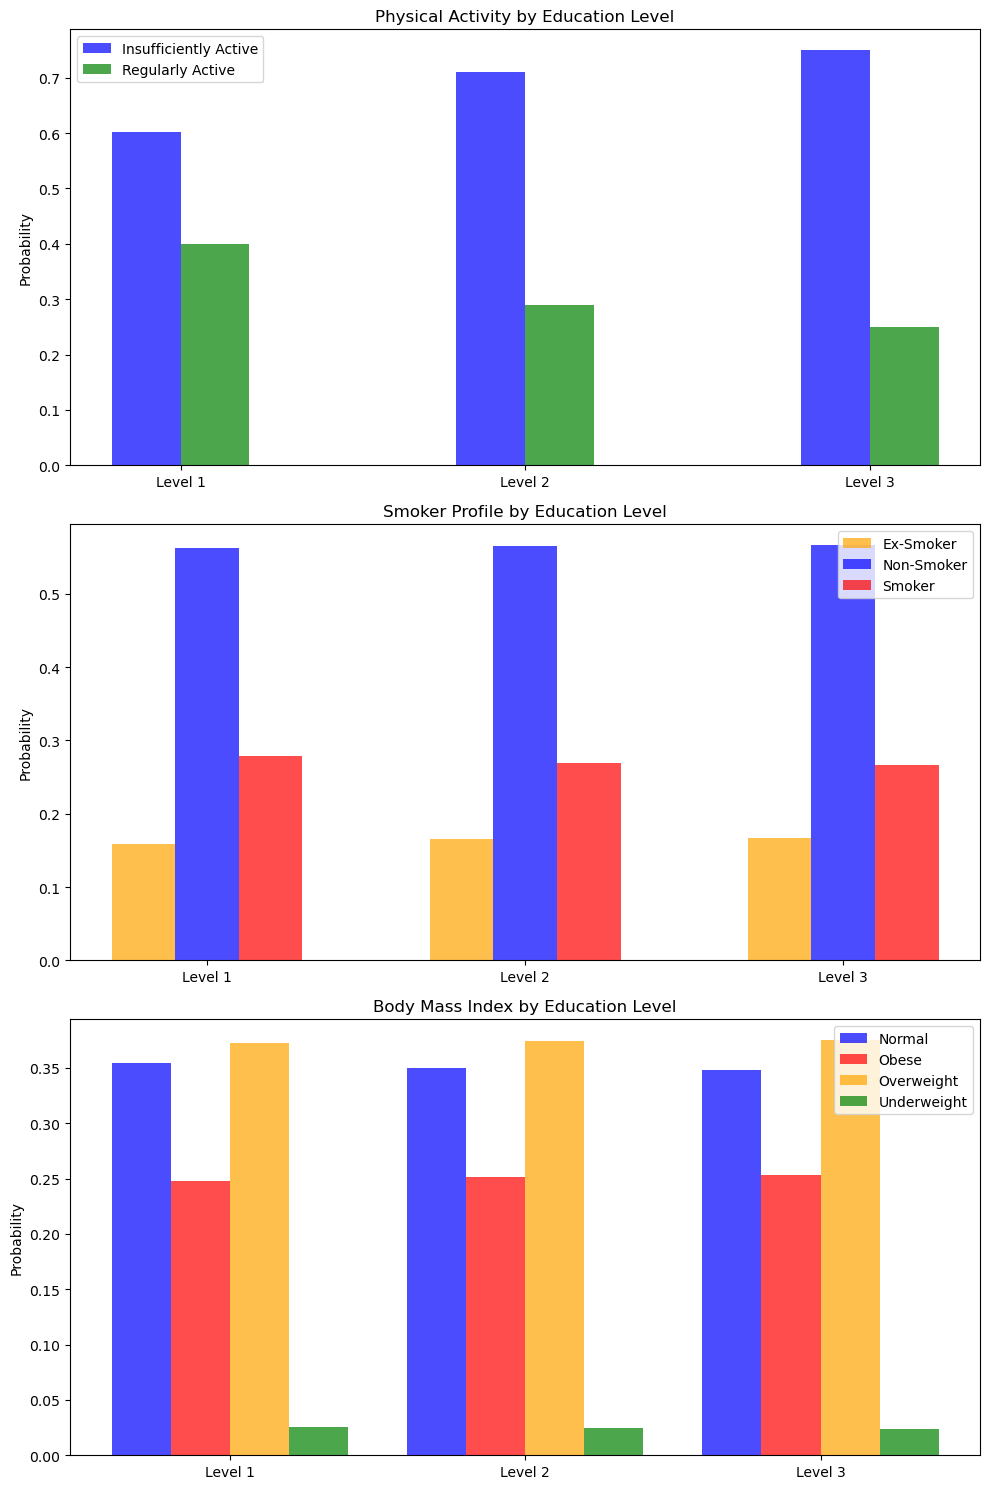

In [33]:
# Data extracted from the user's input
education_levels = ['Level 1', 'Level 2', 'Level 3']

# Physical Activity data
phys_act_insufficient = [0.6012, 0.7112, 0.7499]
phys_act_regular = [0.3988, 0.2888, 0.2501]

# Smoker Profile data
smoker_ex = [0.1582, 0.1651, 0.1675]
smoker_non = [0.5627, 0.5656, 0.5667]
smoker_active = [0.2791, 0.2693, 0.2659]

# Body Mass Index data
bmi_normal = [0.3545, 0.3497, 0.3480]
bmi_obese = [0.2476, 0.2516, 0.2531]
bmi_overweight = [0.3722, 0.3743, 0.3751]
bmi_underweight = [0.0258, 0.0243, 0.0238]

x = np.arange(len(education_levels))  # X-axis positions

# Create a figure with subplots for each category
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot Physical Activity
axs[0].bar(x - 0.1, phys_act_insufficient, width=0.2, label='Insufficiently Active', color='blue', alpha=0.7)
axs[0].bar(x + 0.1, phys_act_regular, width=0.2, label='Regularly Active', color='green', alpha=0.7)
axs[0].set_title('Physical Activity by Education Level')
axs[0].set_ylabel('Probability')
axs[0].set_xticks(x)
axs[0].set_xticklabels(education_levels)
axs[0].legend()

# Plot Smoker Profile
axs[1].bar(x - 0.2, smoker_ex, width=0.2, label='Ex-Smoker', color='orange', alpha=0.7)
axs[1].bar(x, smoker_non, width=0.2, label='Non-Smoker', color='blue', alpha=0.7)
axs[1].bar(x + 0.2, smoker_active, width=0.2, label='Smoker', color='red', alpha=0.7)
axs[1].set_title('Smoker Profile by Education Level')
axs[1].set_ylabel('Probability')
axs[1].set_xticks(x)
axs[1].set_xticklabels(education_levels)
axs[1].legend()

# Plot Body Mass Index
axs[2].bar(x - 0.3, bmi_normal, width=0.2, label='Normal', color='blue', alpha=0.7)
axs[2].bar(x - 0.1, bmi_obese, width=0.2, label='Obese', color='red', alpha=0.7)
axs[2].bar(x + 0.1, bmi_overweight, width=0.2, label='Overweight', color='orange', alpha=0.7)
axs[2].bar(x + 0.3, bmi_underweight, width=0.2, label='Underweight', color='green', alpha=0.7)
axs[2].set_title('Body Mass Index by Education Level')
axs[2].set_ylabel('Probability')
axs[2].set_xticks(x)
axs[2].set_xticklabels(education_levels)
axs[2].legend()

# Adjust layout and display the graph
plt.tight_layout()
plt.show()

escrever conclusoes

**Sex-Based Differences in the Network**

* Investigate whether **sex** plays a role as a modifier of relationships between other variables, particularly:

  * The role of BMI, smoker profile, and mental health outcomes like depression and anxiety.

In [44]:
print("Querying Socioeconomic Status for Males:")
print(infer.query(['SocioeconomicStatus'], evidence={'Sex': 'Male'}))

print("Querying Socioeconomic Status for Females:")
print(infer.query(['SocioeconomicStatus'], evidence={'Sex': 'Female'}))

print("\nQuerying Depression for Males:")
print(infer.query(['Depression'], evidence={'Sex': 'Male'}))

print("Querying Depression for Females:")
print(infer.query(['Depression'], evidence={'Sex': 'Female'}))

print("\nQuerying Anxiety for Males:")
print(infer.query(['Anxiety'], evidence={'Sex': 'Male'}))

print("Querying Anxiety for Females:")
print(infer.query(['Anxiety'], evidence={'Sex': 'Female'}))


Querying Socioeconomic Status for Males:
+------------------------+----------------------------+
| SocioeconomicStatus    |   phi(SocioeconomicStatus) |
+========================+============================+
| SocioeconomicStatus(1) |                     0.3097 |
+------------------------+----------------------------+
| SocioeconomicStatus(2) |                     0.3245 |
+------------------------+----------------------------+
| SocioeconomicStatus(3) |                     0.3658 |
+------------------------+----------------------------+
Querying Socioeconomic Status for Females:
+------------------------+----------------------------+
| SocioeconomicStatus    |   phi(SocioeconomicStatus) |
+========================+============================+
| SocioeconomicStatus(1) |                     0.3107 |
+------------------------+----------------------------+
| SocioeconomicStatus(2) |                     0.3249 |
+------------------------+----------------------------+
| SocioeconomicStatu

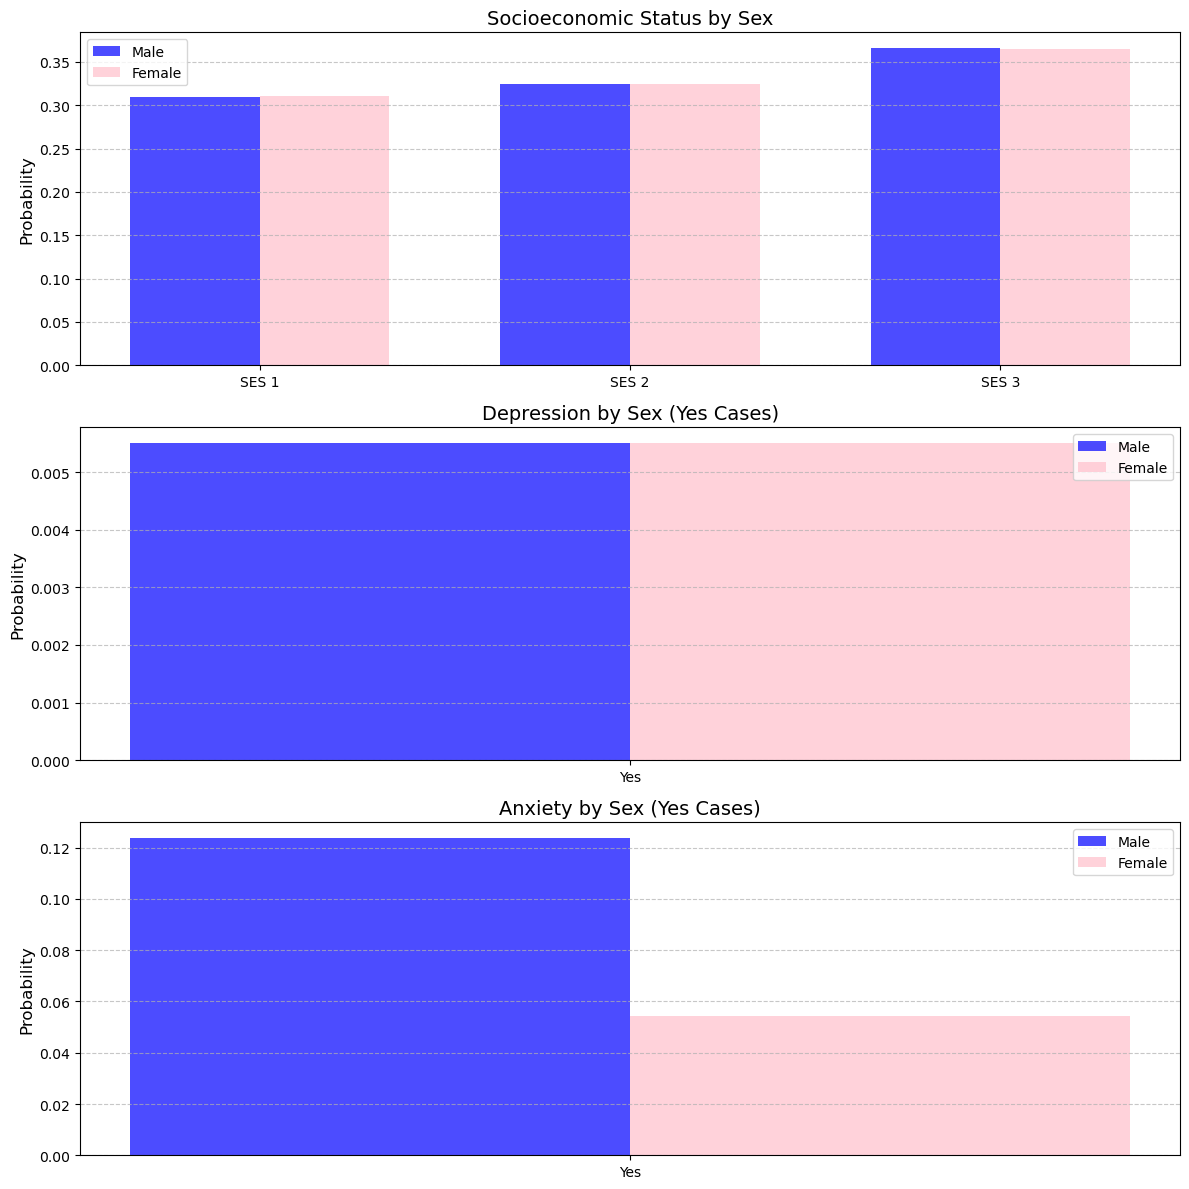

In [77]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Socioeconomic Status
socioeconomic_status = ['SES 1', 'SES 2', 'SES 3']
male_ses_probs = [0.3097, 0.3245, 0.3658]
female_ses_probs = [0.3107, 0.3249, 0.3644]

# Data for Depression
depression = ['Yes']
male_depression_probs = [0.0055]
female_depression_probs = [0.0055]

# Data for Anxiety
anxiety = ['Yes']
male_anxiety_probs = [0.1237]
female_anxiety_probs = [0.0545]

# Set up the figure with subplots
fig, ax = plt.subplots(3, 1, figsize=(12, 12))

# Plot Socioeconomic Status
x = np.arange(len(socioeconomic_status))
width = 0.35  # Standard bar width
ax[0].bar(x - width/2, male_ses_probs, width, label='Male', color='blue', alpha=0.7)
ax[0].bar(x + width/2, female_ses_probs, width, label='Female', color='pink', alpha=0.7)
ax[0].set_title('Socioeconomic Status by Sex', fontsize=14)
ax[0].set_ylabel('Probability', fontsize=12)
ax[0].set_xticks(x)
ax[0].set_xticklabels(socioeconomic_status)
ax[0].legend()
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot Depression with smaller bars
x = np.arange(len(depression))
small_width = 0.2  # Smaller bar width
ax[1].bar(x - small_width/2, male_depression_probs, small_width, label='Male', color='blue', alpha=0.7)
ax[1].bar(x + small_width/2, female_depression_probs, small_width, label='Female', color='pink', alpha=0.7)
ax[1].set_title('Depression by Sex (Yes Cases)', fontsize=14)
ax[1].set_ylabel('Probability', fontsize=12)
ax[1].set_xticks(x)
ax[1].set_xticklabels(depression)
ax[1].legend()
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

# Plot Anxiety with smaller bars
x = np.arange(len(anxiety))
ax[2].bar(x - small_width/2, male_anxiety_probs, small_width, label='Male', color='blue', alpha=0.7)
ax[2].bar(x + small_width/2, female_anxiety_probs, small_width, label='Female', color='pink', alpha=0.7)
ax[2].set_title('Anxiety by Sex (Yes Cases)', fontsize=14)
ax[2].set_ylabel('Probability', fontsize=12)
ax[2].set_xticks(x)
ax[2].set_xticklabels(anxiety)
ax[2].legend()
ax[2].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

conslusoooeeesssss

## 4. Classification of the three medical conditions

In [17]:
from sklearn.metrics import classification_report

# get test label and data
test = pd.read_csv('cardiovascular_test.csv')

Hypercholesterolemia_Original = test['Hypercholesterolemia']
x_test = test.drop(columns=['Hypercholesterolemia'])
predictions = best_model.predict(x_test)

print(classification_report(Hypercholesterolemia_Original,predictions))

  0%|          | 0/704 [00:00<?, ?it/s]

              precision    recall  f1-score   support

          No       0.71      0.85      0.78       795
         Yes       0.64      0.44      0.52       487

    accuracy                           0.69      1282
   macro avg       0.68      0.64      0.65      1282
weighted avg       0.69      0.69      0.68      1282



### CONCLUSÕESSS

In [18]:
from sklearn.metrics import classification_report

# get test label and data
test_data = pd.read_csv('cardiovascular_test.csv')

Hypertension_Original = test_data['Hypertension']
x_test = test_data.drop(columns=['Hypertension'])
predictions = best_model.predict(x_test)

print(classification_report(Hypertension_Original,predictions))

  0%|          | 0/741 [00:00<?, ?it/s]

              precision    recall  f1-score   support

          No       0.83      0.99      0.90      1052
         Yes       0.61      0.07      0.13       230

    accuracy                           0.83      1282
   macro avg       0.72      0.53      0.52      1282
weighted avg       0.79      0.83      0.76      1282



### CONCLUSÕESSSSS

In [19]:
from sklearn.metrics import classification_report

# get test label and data
test_data = pd.read_csv('cardiovascular_test.csv')

Diabetes_Original = test_data['Diabetes']
x_test = test_data.drop(columns=['Diabetes'])
predictions = best_model.predict(x_test)

print(classification_report(Diabetes_Original,predictions))

  0%|          | 0/808 [00:00<?, ?it/s]

              precision    recall  f1-score   support

          No       0.95      1.00      0.98      1224
         Yes       0.00      0.00      0.00        58

    accuracy                           0.95      1282
   macro avg       0.48      0.50      0.49      1282
weighted avg       0.91      0.95      0.93      1282



/Users/fatmabetulozel/opt/anaconda3/envs/TPML/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/fatmabetulozel/opt/anaconda3/envs/TPML/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/fatmabetulozel/opt/anaconda3/envs/TPML/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

### CONCLUSÕESSSS

## 5. Improving classification results

In this step, we focus on improving the classification results by addressing the class imbalance identified during the exploratory data analysis (Step 1). From the analysis, we observed that diabetes was the medical condition with the highest imbalance, as the majority class (patients without diabetes) accounted for 95.42% of the samples, while the minority class (patients with diabetes) made up only 4.58%. To address this imbalance, we applied SMOTE (Synthetic Minority Over-sampling Technique) to the diabetes condition. 


In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTENC

# Load the dataset
file_path = '/Users/fatmabetulozel/AAA/cardiovascular_train.csv'
data = pd.read_csv(file_path)

# Step 1: Convert boolean-like columns to numeric
boolean_columns = ['Anxiety', 'Depression', 'Diabetes', 'Hypercholesterolemia', 'Hypertension']
for col in boolean_columns:
    data[col] = data[col].map({'No': 0, 'Yes': 1})

# Step 2: Identify categorical features and encode them with LabelEncoder if necessary
categorical_features = [
    'Age', 'BodyMassIndex', 'PhysicalActivity', 'Sex', 'SleepDuration', 'SmokerProfile'
]
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Save the encoder for later decoding

# Step 3: Separate features (X) and target (y)
X = data.drop(columns=['Diabetes'])
y = data['Diabetes']

# Identify the indices of categorical columns
categorical_indices = [X.columns.get_loc(col) for col in categorical_features]

# Step 4: Apply SMOTENC for balancing the dataset
smote_nc = SMOTENC(categorical_features=categorical_indices, random_state=42)
X_resampled, y_resampled = smote_nc.fit_resample(X, y)

# Step 5: Reconstruct the DataFrame with the original column names
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['Diabetes'])

balanced_data = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Step 6: Decode categorical columns back to their original labels
for col, le in label_encoders.items():
    balanced_data[col] = le.inverse_transform(balanced_data[col].astype(int))

# Step 7: Convert boolean columns back to 'No' and 'Yes'
for col in boolean_columns:
    balanced_data[col] = balanced_data[col].map({0: 'No', 1: 'Yes'})

# Step 8: Save the balanced dataset
balanced_data.to_csv('cardiovascular_train_balanced.csv', index=False)

# Inspect the balanced class distribution
print("After balancing:")
print(balanced_data['Diabetes'].value_counts())

After balancing:
Diabetes
No     3669
Yes    3669
Name: count, dtype: int64


In [14]:
import pandas as pd
from ydata_profiling import ProfileReport

train_data = pd.read_csv('cardiovascular_train_balanced.csv')

# Generate the profiling report
profile = ProfileReport(train_data, title="Cardiovascular Train Balanced", explorative=True)

# Display the report in the notebook
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [24]:
from IPython.display import Image, display
from pgmpy.estimators import HillClimbSearch, BDeuScore, MaximumLikelihoodEstimator
from pgmpy.models import BayesianNetwork
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from pgmpy.base import DAG

balanced_data = pd.read_csv('cardiovascular_train_balanced.csv')

bdeu_scoring = BDeuScore(balanced_data, equivalent_sample_size=10)

lista = [('Sex', 'Age'), ('Sex', 'Anxiety'), ('Sex', 'Diabetes'), ('Age', 'SocioeconomicStatus'), ('Age', 'BodyMassIndex'), ('Age', 'SmokerProfile'), ('Age', 'Diabetes'), ('Age', 'SleepDuration'), ('Age', 'Hypercholesterolemia'), ('BodyMassIndex', 'Hypertension'), ('BodyMassIndex', 'SocioeconomicStatus'), ('SmokerProfile', 'BodyMassIndex'), ('SleepDuration', 'Depression'), ('SleepDuration', 'Hypercholesterolemia'), ('Hypercholesterolemia', 'Diabetes'), ('Hypercholesterolemia', 'Hypertension'), ('Hypercholesterolemia', 'SmokerProfile'), ('EducationLevel', 'SocioeconomicStatus'), ('Hypertension', 'Anxiety'), ('PhysicalActivity', 'Hypertension'), ('PhysicalActivity', 'Age'), ('PhysicalActivity', 'SmokerProfile'), ('PhysicalActivity', 'Diabetes'), ('PhysicalActivity', 'Sex'), ('PhysicalActivity', 'EducationLevel'), ('Depression', 'EducationLevel')]

# Convert to a BayesianNetwork model and fit it to get CPDs
best_model_balanced = BayesianNetwork(lista)
best_model_balanced.fit(balanced_data, estimator=MaximumLikelihoodEstimator)

bdeu_score = bdeu_scoring.score(best_model_balanced)

print('Edges:', best_model_balanced.edges())
print('Len of edges:', len(best_model_balanced.edges()))
print('BDeu Score:', bdeu_score)



Edges: [('Sex', 'Age'), ('Sex', 'Anxiety'), ('Sex', 'Diabetes'), ('Age', 'SocioeconomicStatus'), ('Age', 'BodyMassIndex'), ('Age', 'SmokerProfile'), ('Age', 'Diabetes'), ('Age', 'SleepDuration'), ('Age', 'Hypercholesterolemia'), ('BodyMassIndex', 'Hypertension'), ('BodyMassIndex', 'SocioeconomicStatus'), ('SmokerProfile', 'BodyMassIndex'), ('SleepDuration', 'Depression'), ('SleepDuration', 'Hypercholesterolemia'), ('Hypercholesterolemia', 'Diabetes'), ('Hypercholesterolemia', 'Hypertension'), ('Hypercholesterolemia', 'SmokerProfile'), ('Hypertension', 'Anxiety'), ('Depression', 'EducationLevel'), ('EducationLevel', 'SocioeconomicStatus'), ('PhysicalActivity', 'Hypertension'), ('PhysicalActivity', 'Age'), ('PhysicalActivity', 'SmokerProfile'), ('PhysicalActivity', 'Diabetes'), ('PhysicalActivity', 'Sex'), ('PhysicalActivity', 'EducationLevel')]
Len of edges: 26
BDeu Score: -72923.17551271078


In [25]:
from sklearn.metrics import classification_report

# get test label and data
test_data = pd.read_csv('cardiovascular_test.csv')

Diabetes_Original = test_data['Diabetes']
x_test = test_data.drop(columns=['Diabetes'])
predictions = best_model_balanced.predict(x_test)

print(classification_report(Diabetes_Original,predictions))

  0%|          | 0/808 [00:00<?, ?it/s]

              precision    recall  f1-score   support

          No       0.96      0.85      0.90      1224
         Yes       0.06      0.19      0.09        58

    accuracy                           0.82      1282
   macro avg       0.51      0.52      0.49      1282
weighted avg       0.92      0.82      0.86      1282



**Antes do SMOTE:**

              precision    recall  f1-score   support

          No       0.95      1.00      0.98      1224
         Yes       0.00      0.00      0.00        58

    accuracy                           0.95      1282
   macro avg       0.48      0.50      0.49      1282
weighted avg       0.91      0.95      0.93      1282

O accuracy tá melhor assim??